### Which machine learning algorithms are Sensitive to Outliers?
- Naive Bayes Clsasifier -----------------> Not sensitive to outlers
- SVM ------------------------------------> Not sensitive to Outliers
- Linear Regression ----------------------> Sensitive To Outliers
- Logistic Regression --------------------> Sensitive To Outliers
- Decision Tree Regressor/Classifier -----> Not Sensitive To Outliers
- Ensemble Technique(RF, XGBOOST, GB) ----> Not Sensitive To Outlers
- KNN  -----------------------------------> Not Sensitive To Outliers
- K-Means --------------------------------> Sensitive To Outliers (bcz, we use euclidien distance and clusters that are created is based on the outliers also)
- Hierarchal -----------------------------> Sensitive To Outliers 
- PCA ------------------------------------> Sensitive To Outliers (We focus on the variance part, if we have more outliers then the whole variance is not getting captured
- DBSCAN ---------------------------------> Sensitive To Outliers 
- Neural Networks ------------------------>  Sensitive To Outliers

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [3]:
df.age.isnull().sum()

174

In [4]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
import seaborn as sns

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

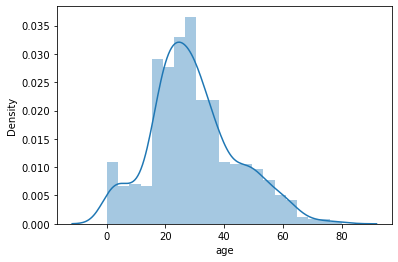

In [6]:
sns.distplot(df.age.dropna())

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

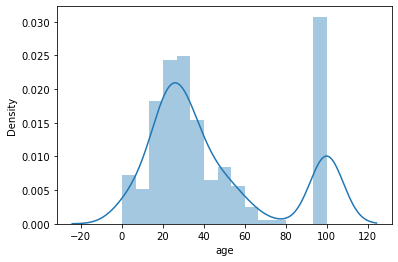

In [7]:
sns.distplot(df.age.fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'No of passengers')

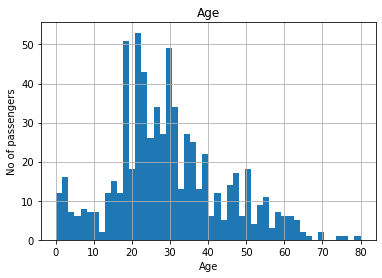

In [8]:
figure = df.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

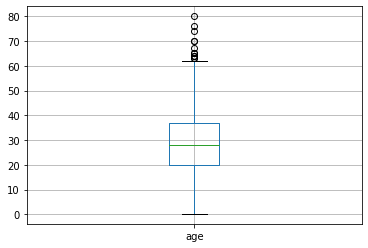

In [9]:
figure = df.boxplot(column='age')

In [10]:
df.age.describe()

count    676.000000
mean      29.519847
std       14.562243
min        0.166700
25%       20.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

### If the Data is Normally Distributed we use this

In [11]:
#### Assuming age follows a gaurssian distribution we will calculate the boudaries which differentiate the outliers
upper_boundary = df.age.mean() + 3 * df.age.std()
lower_boundary = df.age.mean() - 3 * df.age.std()

In [12]:
print(upper_boundary)
print(lower_boundary)
print(df.age.mean())

73.20657749172571
-14.166883113027474
29.519847189349115


### feature is skewed

Text(0, 0.5, 'No of passengers')

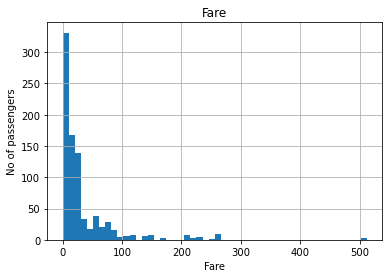

In [13]:
figure = df.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

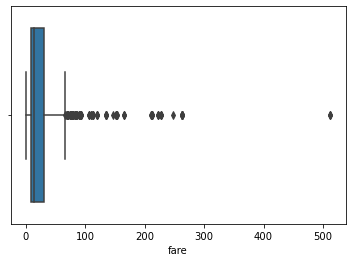

In [14]:
sns.boxplot('fare', data=df)

In [15]:
df['fare'] = df.fare.fillna(df.fare.median())

In [16]:
df.fare.isnull().sum()

0

In [17]:
df.fare.describe()

count    850.000000
mean      33.989284
std       53.678483
min        0.000000
25%        7.895800
50%       14.108300
75%       30.923950
max      512.329200
Name: fare, dtype: float64

In [18]:
### Let's compute the interquantile range to calculate the boundries
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

In [19]:
lower_bridge = df.fare.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.fare.quantile(0.75) + (IQR * 1.5)

In [20]:
print(lower_bridge)
print(upper_bridge)

-26.646424999999994
65.46617499999999


In [21]:
## Extreme outlier
lower_bridge = df.fare.quantile(0.25) - (IQR * 3)
upper_bridge = df.fare.quantile(0.75) + (IQR * 3)

In [22]:
print(lower_bridge)
print(upper_bridge)

-61.18864999999999
100.0084


In [23]:
data = df.copy()

In [24]:
data.loc[df['age'] >= 73, 'age'] = 73

In [25]:
data.loc[df['fare'] >= 100, 'fare'] = 100

Text(0, 0.5, 'No of passengers')

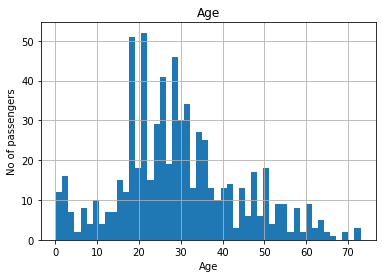

In [26]:
figure = data.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

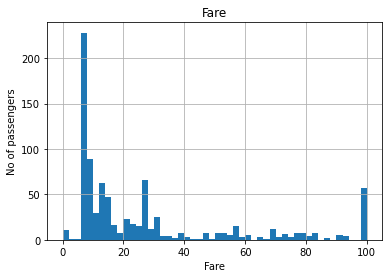

In [27]:
figure = data.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'fare']].fillna(0), data['survived'], test_size=0.3)

In [30]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[138  10]
 [ 82  25]]
Accuracy Score: 0.6392156862745098
Roc_Auc_Score: 0.7511682242990655


In [31]:
### Logistic Regression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[116  32]
 [ 50  57]]
Accuracy Score: 0.6784313725490196
Roc_Auc_Score: 0.7346867895933316
